# Description of Data Set

This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.

Fields include

Rank - Ranking of overall sales

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.

The script to scrape the data is available at https://github.com/GregorUT/vgchartzScrape.
It is based on BeautifulSoup using Python.
There are 16,598 records. 2 records were dropped due to incomplete information.

# TASKS
* Compare the popularity of genres over time.
* Compare the popularity of genre by platform
* TODO:
* TODO:
* TODO:

Importing Libraries
--

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import numpy as np

Making Initial Dataframe
--

In [66]:
df1 = pd.read_csv('./input/vgsales.csv')
df1.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Let's see what we're working with
--

In [67]:
df1.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [68]:
df1.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [69]:
df1.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


Frequency of observations by platform
--

In [70]:
df1['Platform'].value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
GB        98
NES       98
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

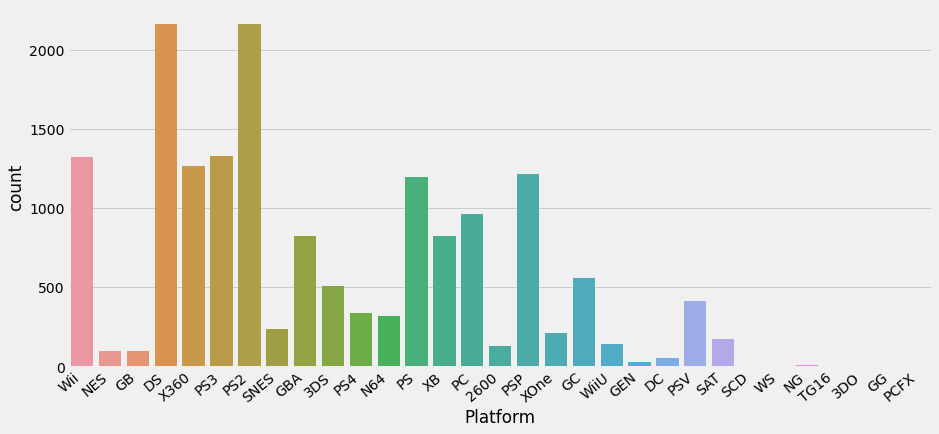

In [71]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_axes([0,0,1,1])
sns.countplot(x='Platform', data=df1, ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

Looks like we're looking at mostly somewhat older platforms

Frequency of observations by publisher
--

In [72]:
df1['Publisher'].value_counts()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Pack In Soft                       1
fonfun                             1
Fields                             1
CPG Products                       1
Palcom                             1
Name: Publisher, Length: 578, dtype: int64

So we've got 578 different publishers in this dataset

Frequency of Observations by Year
--

In [73]:
df1['Year'].value_counts()

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

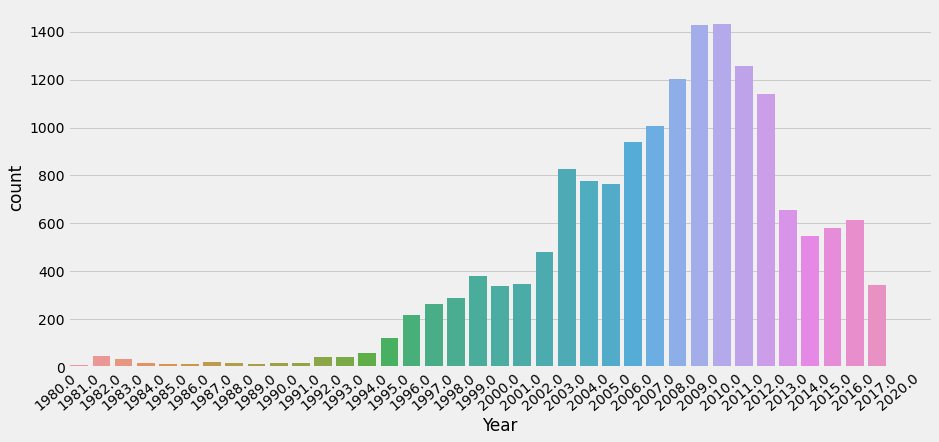

In [74]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_axes([0,0,1,1])
sns.countplot(x='Year', data=df1, ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

Frequency of genres
--

In [75]:
df1['Genre'].value_counts()

Action          3316
Sports          2346
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

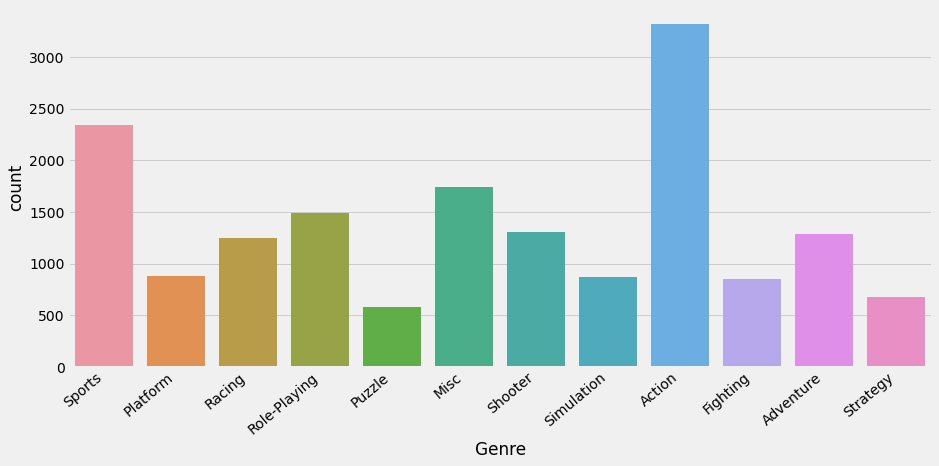

In [76]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_axes([0,0,1,1])
sns.countplot(x='Genre', data=df1, ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

For the sake of this analysis, moving forward I am only going to be looking at the modern platforms. PC, Xbox One, Playstation 4.
--

In [80]:
df2 = df1[np.logical_or.reduce([
    df1['Platform'] == 'PS4',
    df1['Platform'] == 'PC',
    df1['Platform'] == 'XOne'
])]

df2

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
33,34,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
44,45,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.98
77,78,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
83,84,The Sims 3,PC,2009.0,Simulation,Electronic Arts,0.98,6.42,0.00,0.71,8.11
92,93,Star Wars Battlefront (2015),PS4,2015.0,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67
...,...,...,...,...,...,...,...,...,...,...,...
16570,16573,Farming 2017 - The Simulation,PS4,2016.0,Simulation,UIG Entertainment,0.00,0.01,0.00,0.00,0.01
16576,16579,Rugby Challenge 3,XOne,2016.0,Sports,Alternative Software,0.00,0.01,0.00,0.00,0.01
16577,16580,Damnation,PC,2009.0,Shooter,Codemasters,0.00,0.01,0.00,0.00,0.01
16585,16588,Breach,PC,2011.0,Shooter,Destineer,0.01,0.00,0.00,0.00,0.01


Now, let's extract and compare data from each modern platform.
--

Let's start with the frequency genres for each modern platform.
--

In [81]:
df2.groupby('Platform')['Genre'].value_counts()

Platform  Genre       
PC        Strategy        188
          Action          165
          Shooter         148
          Simulation      115
          Role-Playing    104
          Adventure        65
          Racing           60
          Sports           49
          Puzzle           25
          Misc             24
          Platform         11
          Fighting          6
PS4       Action          122
          Role-Playing     47
          Sports           43
          Shooter          34
          Adventure        19
          Fighting         17
          Racing           17
          Misc             15
          Platform         11
          Simulation        5
          Strategy          5
          Puzzle            1
XOne      Action           68
          Sports           36
          Shooter          33
          Racing           19
          Misc             15
          Role-Playing     13
          Adventure        12
          Fighting          7
          Platfor

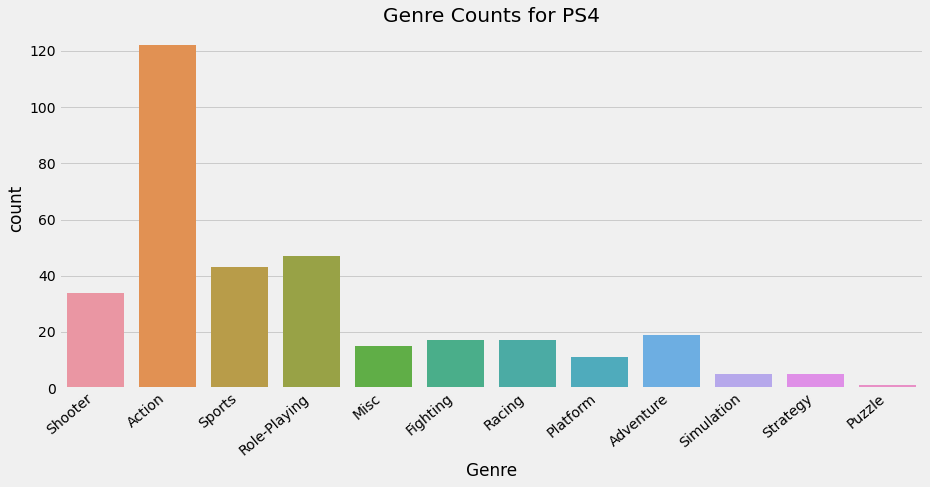

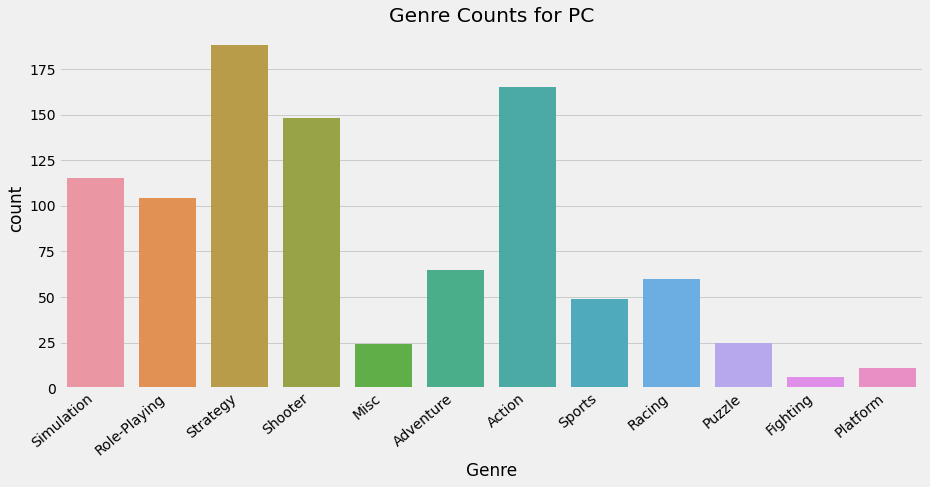

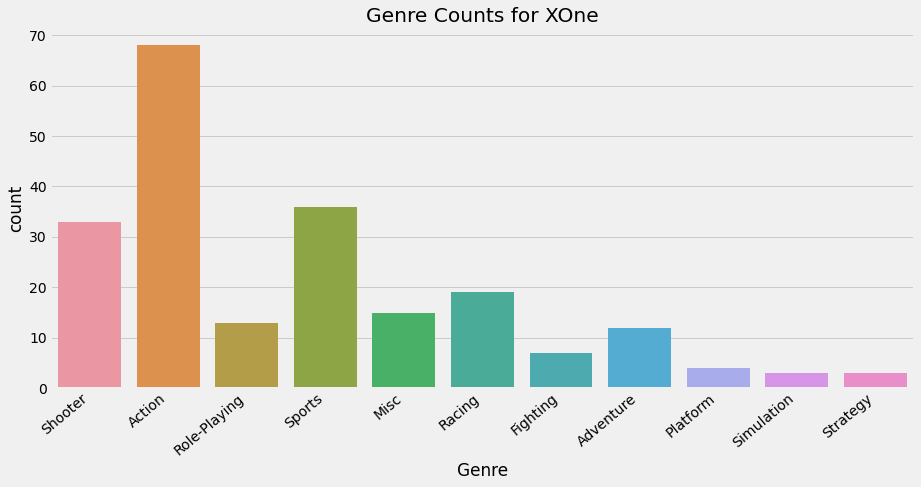

In [94]:
for i in df2['Platform'].unique():
    fig = plt.figure(figsize=(12, 5))
    ax = fig.add_axes([0,0,1,1])
    sns.countplot(x='Genre', data=df2.loc[df2['Platform'] == str(i)], ax=ax)
    plt.title(f'Genre Counts for {i}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.tight_layout()
    plt.show()

array(['PS4', 'PC', 'XOne'], dtype=object)